# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set starting URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={weather_api_key}&q="

# Create empty cells to populate into DataFrame
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Set initial count for records and sets
records = 0
sets = 1

# Loop through each cities and populate info into respective lists
for city in cities:
    response = requests.get(url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if records > 48:
            records = 1
            sets += 1
            city_name.append(city)
        else:
            records += 1
            city_name.append(city)
        print(f"Processing Record {records} or Set {sets} | {city}")
    except:
        print(f"City not found. Skipping...")
print('''------------------------------
Data Retrieval Complete
------------------------------''')

Processing Record 1 or Set 1 | noumea
Processing Record 2 or Set 1 | busselton
Processing Record 3 or Set 1 | albany
Processing Record 4 or Set 1 | bubaque
Processing Record 5 or Set 1 | constitucion
Processing Record 6 or Set 1 | fortuna
Processing Record 7 or Set 1 | vila velha
Processing Record 8 or Set 1 | coihaique
Processing Record 9 or Set 1 | mataura
Processing Record 10 or Set 1 | giulianova
Processing Record 11 or Set 1 | hami
Processing Record 12 or Set 1 | rikitea
Processing Record 13 or Set 1 | williamsport
Processing Record 14 or Set 1 | goderich
Processing Record 15 or Set 1 | qaanaaq
City not found. Skipping...
Processing Record 16 or Set 1 | east london
Processing Record 17 or Set 1 | ushuaia
Processing Record 18 or Set 1 | cabitan
Processing Record 19 or Set 1 | cidreira
Processing Record 20 or Set 1 | cape town
Processing Record 21 or Set 1 | sao felix do xingu
Processing Record 22 or Set 1 | husavik
Processing Record 23 or Set 1 | vestmanna
Processing Record 24 or S

Processing Record 45 or Set 4 | biak
Processing Record 46 or Set 4 | timizart
Processing Record 47 or Set 4 | port elizabeth
Processing Record 48 or Set 4 | russellville
Processing Record 49 or Set 4 | alim
Processing Record 1 or Set 5 | sonqor
City not found. Skipping...
Processing Record 2 or Set 5 | klaksvik
City not found. Skipping...
Processing Record 3 or Set 5 | svetlogorsk
Processing Record 4 or Set 5 | kahului
Processing Record 5 or Set 5 | campos do jordao
Processing Record 6 or Set 5 | sakassou
Processing Record 7 or Set 5 | prince rupert
City not found. Skipping...
Processing Record 8 or Set 5 | roswell
Processing Record 9 or Set 5 | lavrentiya
Processing Record 10 or Set 5 | leningradskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 11 or Set 5 | haines junction
Processing Record 12 or Set 5 | bolshevik
Processing Record 13 or Set 5 | kushima
Processing Record 14 or Set 5 | bose
City not found. Skipping...
Processing Record 15 or Set 5 | bredas

Processing Record 31 or Set 8 | shingu
Processing Record 32 or Set 8 | najran
Processing Record 33 or Set 8 | wenling
Processing Record 34 or Set 8 | adre
Processing Record 35 or Set 8 | ubinskoye
Processing Record 36 or Set 8 | honningsvag
Processing Record 37 or Set 8 | abalak
Processing Record 38 or Set 8 | sabzevar
Processing Record 39 or Set 8 | mahina
Processing Record 40 or Set 8 | fort nelson
Processing Record 41 or Set 8 | komsomolskiy
Processing Record 42 or Set 8 | kormilovka
Processing Record 43 or Set 8 | charkhari
Processing Record 44 or Set 8 | road town
Processing Record 45 or Set 8 | nanyamba
Processing Record 46 or Set 8 | amboasary
Processing Record 47 or Set 8 | enterprise
Processing Record 48 or Set 8 | kokopo
Processing Record 49 or Set 8 | sisimiut
Processing Record 1 or Set 9 | marsh harbour
Processing Record 2 or Set 9 | mehran
Processing Record 3 or Set 9 | wagar
Processing Record 4 or Set 9 | lima
Processing Record 5 or Set 9 | sao filipe
Processing Record 6 

Processing Record 27 or Set 12 | zyryanskoye
Processing Record 28 or Set 12 | oriximina
Processing Record 29 or Set 12 | azambuja
Processing Record 30 or Set 12 | chardara
Processing Record 31 or Set 12 | vanderhoof
Processing Record 32 or Set 12 | uglovka
Processing Record 33 or Set 12 | chifeng
Processing Record 34 or Set 12 | shenjiamen
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 35 or Set 12 | masvingo
Processing Record 36 or Set 12 | broome
City not found. Skipping...
Processing Record 37 or Set 12 | suntar
Processing Record 38 or Set 12 | jalu
Processing Record 39 or Set 12 | paracuru
Processing Record 40 or Set 12 | baykit
Processing Record 41 or Set 12 | tsabong
Processing Record 42 or Set 12 | omsukchan
Processing Record 43 or Set 12 | tura
Processing Record 44 or Set 12 | lensk
Processing Record 45 or Set 12 | baruta
Processing Record 46 or Set 12 | aswan
Processing Record 47 or Set 12 | ela

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create DataFrame from lists above
df = pd.DataFrame({"City": city_name, 
                   "Lat": lat, 
                   "Lng": lng, 
                   "Max Temp": max_temp,
                   "Humidity": humidity, 
                   "Cloudiness": cloudiness, 
                   "Wind Speed": wind_speed, 
                   "Country": country, 
                   "Date": date})
df.to_csv("../output_data/WeatherPy_output.csv")
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,noumea,-22.2763,166.4572,81.00,65,0,9.22,NC,1620800426
1,busselton,-33.6500,115.3333,61.00,62,83,4.00,AU,1620800555
2,albany,42.6001,-73.9662,46.00,73,11,11.74,US,1620800556
3,bubaque,11.2833,-15.8333,77.36,77,81,9.31,GW,1620800556
4,constitucion,-35.3333,-72.4167,53.02,54,25,4.94,CL,1620800557


In [5]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,19.791431,18.003877,64.350853,67.493174,46.945392,7.262901,1.620801e+09
std,33.018407,89.017237,17.601473,22.879561,38.813696,4.829863,8.538541e+01
min,-54.800000,-175.200000,15.800000,3.000000,0.000000,0.270000,1.620800e+09
25%,-7.731900,-62.499625,51.010000,52.000000,3.000000,3.530000,1.620801e+09
50%,23.198250,23.491450,66.000000,73.000000,40.000000,6.140000,1.620801e+09
75%,46.240575,93.347700,78.095000,85.750000,89.750000,9.740000,1.620801e+09
max,78.218600,179.316700,103.410000,100.000000,100.000000,25.100000,1.620801e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

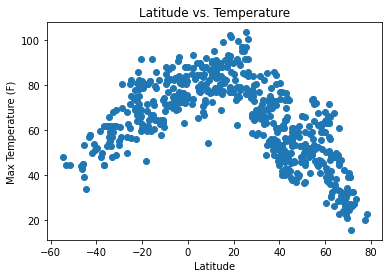

In [8]:
# Define axis
xaxis = df["Lat"]
yaxis = df["Max Temp"]

# Graph
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.set(title="Latitude vs. Temperature",
       xlabel="Latitude",
       ylabel="Max Temperature (F)");
fig.savefig("../output_data/Fig1.png")

There seems to be a strong correlation between latitude and max temperature. Moving up from the Southern Hemisphere, we have a positive correlation up to about 20 latitude, and then a negative correlation as we move further North.

## Latitude vs. Humidity Plot

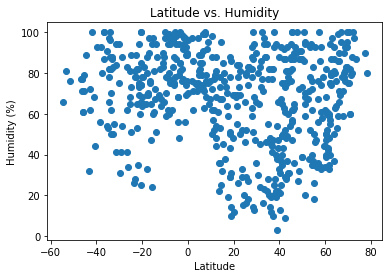

In [9]:
# Define axis
xaxis = df["Lat"]
yaxis = df["Humidity"]

# Graph
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.set(title="Latitude vs. Humidity",
       xlabel="Latitude",
       ylabel="Humidity (%)");
fig.savefig("../output_data/Fig2.png")

There's no obvious correlation here between latitude and humidity. Higher latitude does show a wider range of humidity which is interesting to note.

## Latitude vs. Cloudiness Plot

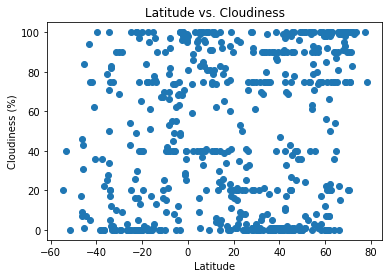

In [10]:
# Define axis
xaxis = df["Lat"]
yaxis = df["Cloudiness"]

# Graph
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.set(title="Latitude vs. Cloudiness",
       xlabel="Latitude",
       ylabel="Cloudiness (%)");
fig.savefig("../output_data/Fig3.png")

Latitude vs. cloudiness is another area where there seems to be no strong correlation. It is interesting to see, however, that in all latitudes, there are strong clusters of data for extreme cloudiness (either 100% or 0%) resulting in almost a solid line on the top and bottom of this graph.

## Latitude vs. Wind Speed Plot

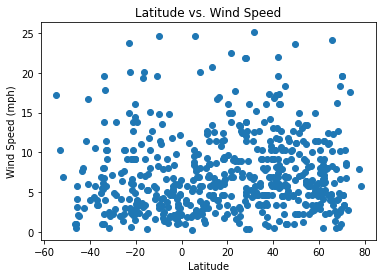

In [11]:
# Define axis
xaxis = df["Lat"]
yaxis = df["Wind Speed"]

# Graph
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.set(title="Latitude vs. Wind Speed",
       xlabel="Latitude",
       ylabel="Wind Speed (mph)");
fig.savefig("../output_data/Fig4.png")

There appears to be a correlation of almost 0 in terms of latitude and wind speed. It seems that across all latitudes, wind speed is almost always below 15 mph. Only in rare instances does it rise above 15 mph.

## Linear Regression

In [12]:
# Split up Northern and Southern Hemispheres
df_n = df.loc[df["Lat"] >= 0, :]
df_s = df.loc[df["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8123549889585403


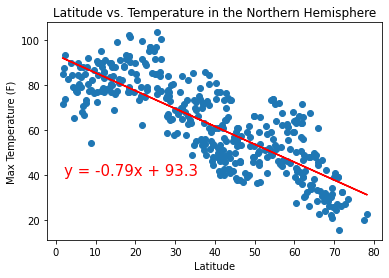

In [13]:
# Define axis
xaxis = df_n["Lat"]
yaxis = df_n["Max Temp"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (2,40), color="red", fontsize="15")
ax.set(title="Latitude vs. Temperature in the Northern Hemisphere",
       xlabel="Latitude",
       ylabel="Max Temperature (F)");
fig.savefig("../output_data/Fig5.png")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7463264786218978


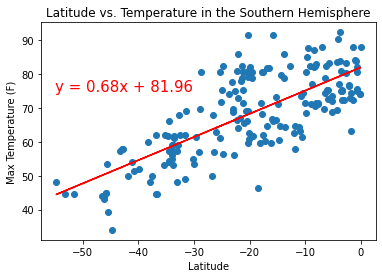

In [14]:
# Define axis
xaxis = df_s["Lat"]
yaxis = df_s["Max Temp"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (-55,75), color="red", fontsize="15")
ax.set(title="Latitude vs. Temperature in the Southern Hemisphere",
       xlabel="Latitude",
       ylabel="Max Temperature (F)");
fig.savefig("../output_data/Fig6.png")
print(f"The r-value is: {rvalue}")

This pair of plots are probably the most obvious answer to the question posed in README file: "What's the weather like as we approach the equator?" We can clearly see here that temperature rises as it approaches the quator (latitude 0) and falls as it moves away from it.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05221391924509137


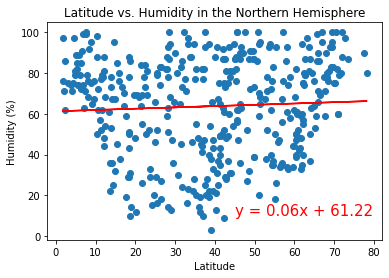

In [15]:
# Define axis
xaxis = df_n["Lat"]
yaxis = df_n["Humidity"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (45,10), color="red", fontsize="15")
ax.set(title="Latitude vs. Humidity in the Northern Hemisphere",
       xlabel="Latitude",
       ylabel="Humidity (%)");
fig.savefig("../output_data/Fig7.png")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19807306140928552


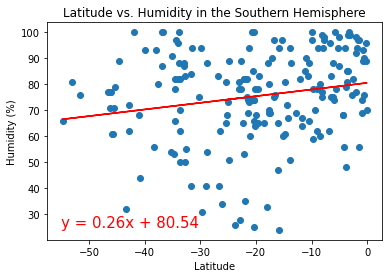

In [16]:
# Define axis
xaxis = df_s["Lat"]
yaxis = df_s["Humidity"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (-55,25), color="red", fontsize="15")
ax.set(title="Latitude vs. Humidity in the Southern Hemisphere",
       xlabel="Latitude",
       ylabel="Humidity (%)");
fig.savefig("../output_data/Fig8.png")
print(f"The r-value is: {rvalue}")

Northern Hemisphere data offers little insight as the data are spread out very evenly. Southern Hemisphere data, however, reveals a slightly stronger (positive) relationship between latitude and humidity: as we move north towards the equator, humidity rises.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12379594891407268


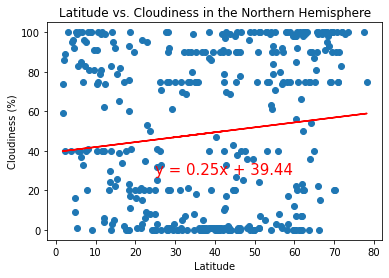

In [17]:
# Define axis
xaxis = df_n["Lat"]
yaxis = df_n["Cloudiness"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (25,28), color="red", fontsize="15")
ax.set(title="Latitude vs. Cloudiness in the Northern Hemisphere",
       xlabel="Latitude",
       ylabel="Cloudiness (%)");
fig.savefig("../output_data/Fig9.png")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.26600678564020747


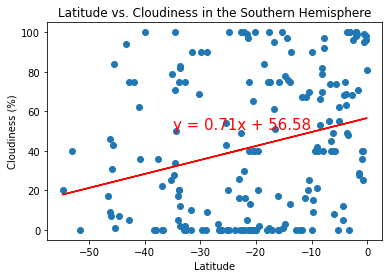

In [18]:
# Define axis
xaxis = df_s["Lat"]
yaxis = df_s["Cloudiness"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (-35,51), color="red", fontsize="15")
ax.set(title="Latitude vs. Cloudiness in the Southern Hemisphere",
       xlabel="Latitude",
       ylabel="Cloudiness (%)");
fig.savefig("../output_data/Fig10.png")
print(f"The r-value is: {rvalue}")

The clusters of extreme cloudiness are more present in the Northern Hemisphere dataset. The Southern Hemisphere dataset reveals a weak positive relationship where cloudiness rises as we approach the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.005670236718461677


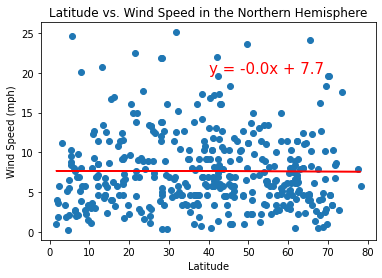

In [19]:
# Define axis
xaxis = df_n["Lat"]
yaxis = df_n["Wind Speed"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (40,20), color="red", fontsize="15")
ax.set(title="Latitude vs. Wind Speed in the Northern Hemisphere",
       xlabel="Latitude",
       ylabel="Wind Speed (mph)");
fig.savefig("../output_data/Fig11.png")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.059195283123119516


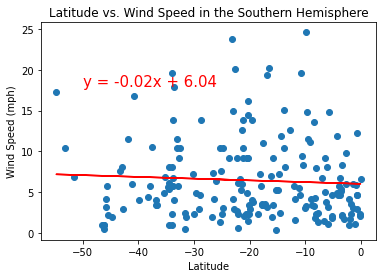

In [20]:
# Define axis
xaxis = df_s["Lat"]
yaxis = df_s["Wind Speed"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (-50,18), color="red", fontsize="15")
ax.set(title="Latitude vs. Wind Speed in the Southern Hemisphere",
       xlabel="Latitude",
       ylabel="Wind Speed (mph)");
fig.savefig("../output_data/Fig12.png")
print(f"The r-value is: {rvalue}")

Both datasets in this pair reveal the same near-zero relationship between wind speed and latitude. The flat slope shows that wind speed is not affected much by distance from the equator.